<font color = 'blue'> <h1> <center> Processo Seletivo Poli Júnior - 2023.0  </center> </h1> </font> 
    <h2> <center> Núcleo de Produção - Analytics </center> </h2>
    

Olá, boas vindas ao Processo Seletivo 2023.0 da Poli Júnior! Essa é a versão do PS para quem deseja executar um entregável relacionado a área de Analytics.
O entregável de Analytics será exclusivamente feito em Python, usando algumas bibliotecas voltadas para a análise de dados em si. Seguem algumas regras gerais para o entregável:<ul>
<li>A entrega consiste em enviar esse mesmo arquivo em .ipynb até às 23:59 horas do dia 01/02. <br></li>
<li>Disponibilizamos vídeos para introdução aos conteúdos cobrados, no link: https://drive.google.com/drive/folders/1BOvPgISUJM43Tj_Tsim5R9s_3KxkBz0t?usp=sharing.</li><li> Além disso, há um grupo para tirar dúvidas, no link: https://chat.whatsapp.com/HrY3XWszDkIFCumlbWRv5u<br></li>
<li>Avaliaremos todo o conteúdo feito, não sendo necessesário o preenchimento de todos os itens para prosseguir a etapa de avaliação<br></li>
<li><b>NÃO SE IDENTIFIQUE NO ARQUIVO, APENAS COM O NÚMERO USP NO NOME DO ARQUIVO</b> <br></li>
    <li>Adicione quantas células forem necessárias<br></li>

<li>O resultado será corrigido de acordo com as informações da base, não se preocupe em ir atrás de dados on-line<br></li></ul>
<b>Obrigado pela atenção e bom entregável.</b>


# Parte 1: Perguntas diretas

A primeira parte do entregável consiste em perguntas diretas que devem ser respondidas no espaço destinado. A base foi fornecida por uma grande rede de supermercados, cliente da Poli Júnior.


A base consiste das seguinte colunas:
* Product: Nome do produto<br>

* Order ID: ID do pedido<br>

* Order Date: Data do pedido<br>

* category: Categoria do produto<br>

* sub_category: Sub categoria do produto <br>

* brand: Marca do Produto<br>

* sale_price: Preço de Venda <br>

* market_price: Preço de mercado<br>

* type: Tipo do produto<br>

* rating: Avaliação do produto<br>

* Quantity Ordered: Quantidade comprada <br>

* Pesquisa: Pesquisa realizada pelo supermercado com 3 perguntas. Sobre conhecimento do mercado (Indicação, Internet, Placas, Outros, 0), qualidade do produto (Ótimo, Bom, Ruim, Péssimo, 0) e preferência de compra (Física, Online,0), em que 0 representa resposta em branco. As respostas estão fora de ordem dentro de uma lista da coluna.<br>









#### Importação das bibliotecas utilizadas

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Leitura da base de dados

In [14]:
#Leitura da base (coloque o arquivo na mesma pasta na qual o código está salvo)
df=pd.read_csv("BasePS230.csv")

# Questão 1 - Limpeza da base  
###  É sempre importante verificar a integridade da base e de suas colunas.

#### a) Verifique se há valores em branco nas colunas. Em caso positivo, remova as linhas com valores em branco. 






In [15]:

if df[df.columns].isnull().sum().tolist() == [0]*df.columns.size:
    print("não há valores nulos")
else:
    df.dropna(inplace = True)
    print("valores nulos removidos")

não há valores nulos


#### b) Verifique os tipos de dados de cada coluna. Caso existir um melhor tipo de dado para a coluna, realizar a alteração. Lembre-se do calendário.

In [16]:
df.info() 
#foi observado que o campo Order Date datetime64[ns] foi o mais adequado
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174858 entries, 0 to 174857
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           174858 non-null  object 
 1   Order ID          174858 non-null  int64  
 2   Order Date        174858 non-null  object 
 3   category          174858 non-null  object 
 4   sub_category      174858 non-null  object 
 5   brand             174858 non-null  object 
 6   sale_price        174858 non-null  float64
 7   market_price      174858 non-null  float64
 8   type              174858 non-null  object 
 9   rating            174858 non-null  float64
 10  Quantity Ordered  174858 non-null  int64  
 11  Pesquisa          174858 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.0+ MB


#### c) Por um erro de sistema, o lançamento de um mesmo produto em um mesmo pedido e na mesma data (Product, Order ID e Order Date) foi realizado em 2 linhas diferentes. De acordo com as normas da rede, o correto é que isso seja refletido na coluna Quantity Ordered e não em linhas duplicadas. Corrija essa informação e redefina o index.

In [17]:
firstOccurrence = df[df.duplicated(['Product','Order ID', 'Order Date'],keep='last')]
duplicateRows = df[df.duplicated(['Product','Order ID', 'Order Date'])]
orderid =firstOccurrence['Order ID'].tolist()[0]
df.drop_duplicates(subset=['Product','Order ID', 'Order Date'], keep='first', inplace=True)
df.loc[df['Order ID'] == orderid]['Quantity Ordered'] += 1
df.reset_index(inplace=True, drop=True)

C:\Users\joaop\AppData\Local\Temp\ipykernel_4944\4207331915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Order ID'] == orderid]['Quantity Ordered'] += 1


#### Para as questões seguintes, utilize a base obitda como resultado da questão 1
# Questão 2
#### a) Obtenha um dataframe com o faturamento total de cada mês, baseado no sale_price. Obs: sale_price corresponde ao preço de uma unidade do produto.


In [18]:
index = [1,2,3,4,5,6,7,8,9,10,11,12]
columns = ["Meses", "Montante"]
data = [['Janeiro',0],['Fevereiro',0],['Março',0],['Abril',0],['Maio',0],['Junho',0],['Julho',0],['Agosto',0],['Setembro',0],['Outubro',0],['Novembro',0],['Dezembro',0]]
monthlyBilling = pd.DataFrame(data,index , columns)
for month in range(1,13):
    monthFrame = df.loc[df['Order Date'].dt.month == month] #search for all occurrence in the month
    for index, row in monthFrame.iterrows(): #iterate for every occurrence to calculate the totla price
        productBilling =  row['sale_price'] * row['Quantity Ordered']
        monthlyBilling["Montante"].loc[month] +=  productBilling
monthlyBilling


C:\Users\joaop\AppData\Local\Temp\ipykernel_4944\2783788423.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyBilling["Montante"].loc[month] +=  productBilling


,Meses,Montante
1,Janeiro,3467733.92
2,Fevereiro,3888754.51
3,Março,4435726.21
4,Abril,4688456.50
5,Maio,5262271.32
6,Junho,3883561.91
7,Julho,4079458.91
8,Agosto,4671669.13
9,Setembro,4474009.51
10,Outubro,4817603.80


#### b) Obtenha o Order ID do pedido com maior faturamento e seu respectivo faturamento

In [19]:

biggestBillingValue = 0
for month in range(1,13):
    monthFrame = df.loc[df['Order Date'].dt.month == month]
    for index, row in monthFrame.iterrows():
        productBilling =  row['sale_price'] * row['Quantity Ordered']
        if productBilling > biggestBillingValue:
            biggestBillingValue = productBilling
            biggestBillingOrderID = row['Order ID']
print("Order ID do maior faturamento "+ str(biggestBillingOrderID) +" e seu faturamento é "+ str(biggestBillingValue))


Order ID do maior faturamento 150256 e seu faturamento é 7400.0


#### c) Monte um gráfico de linha que represente o faturamento da rede de supermercado ao longo do ano da categoria (category) com maior faturamento.


C:\Users\joaop\AppData\Local\Temp\ipykernel_4944\4109353500.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyBilling['Montante'].loc[index] = maxcategoryDF['sale_price'].loc[maxcategoryDF['Order Date'].dt.month == index].sum() * maxcategoryDF['Quantity Ordered'].loc[maxcategoryDF['Order Date'].dt.month == index].sum()


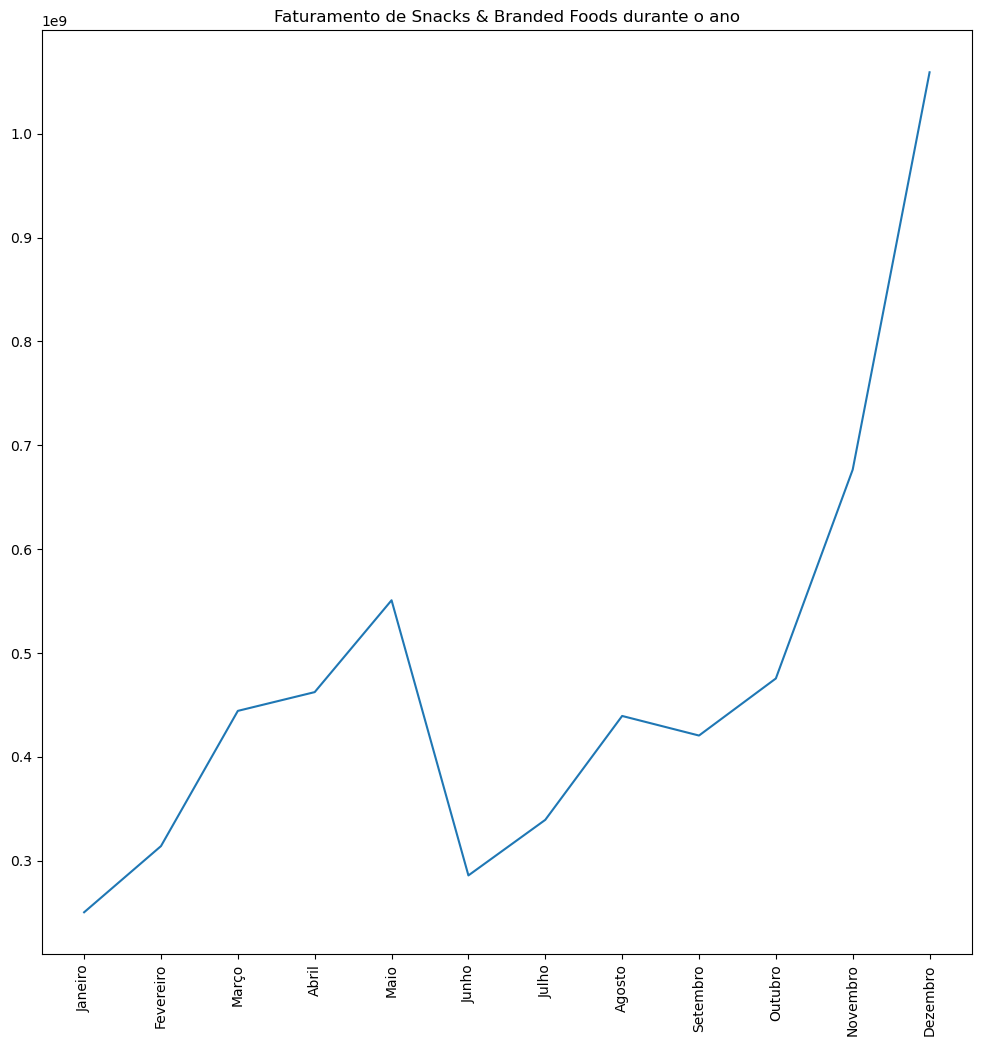

In [20]:
# first idea
""" categoryBilling = pd.DataFrame(columns=['category','Billing'])
for index, row in df.iterrows():
    df1 = categoryBilling.loc[categoryBilling['category'] == row['category']]
    if df1.empty:
        productBilling =  row['sale_price'] * row['Quantity Ordered']
        df1 = pd.DataFrame([[row['category'], productBilling]],columns = ['category','Billing'])
        categoryBilling = pd.concat([categoryBilling, df1])
        categoryBilling.reset_index(inplace=True, drop=True)
    else:
        productBilling =  row['sale_price'] * row['Quantity Ordered']
        categoryBilling['Billing'].loc[categoryBilling['category'] == row['category']] += productBilling
categoryBilling """

#remembered there was groupby
categoryBilling = pd.DataFrame(columns=['category','Billing'])
df1 = df.groupby(["category"]).sum()
for index, row in df1.iterrows():
    productBilling =  row['sale_price'] * row['Quantity Ordered']
    df2 = pd.DataFrame([[index, productBilling]],columns = ['category','Billing'])
    categoryBilling = pd.concat([categoryBilling, df2])
categoryBilling.reset_index(inplace=True, drop=True)

#preparing the highest category DataFrame
maxcategory = categoryBilling.max()

maxcategoryDF = pd.DataFrame(df.loc[df['category'] == maxcategory['category']])

index = [1,2,3,4,5,6,7,8,9,10,11,12]
columns = ["Meses", "Montante"]
data = [['Janeiro',0],['Fevereiro',0],['Março',0],['Abril',0],['Maio',0],['Junho',0],['Julho',0],['Agosto',0],['Setembro',0],['Outubro',0],['Novembro',0],['Dezembro',0]]
monthlyBilling = pd.DataFrame(data,index , columns)

for index in range(1,13):
    monthlyBilling['Montante'].loc[index] = maxcategoryDF['sale_price'].loc[maxcategoryDF['Order Date'].dt.month == index].sum() * maxcategoryDF['Quantity Ordered'].loc[maxcategoryDF['Order Date'].dt.month == index].sum()


plt.figure(figsize=(monthlyBilling['Meses'].size,monthlyBilling['Montante'].size),dpi=100)
plt.plot(monthlyBilling['Meses'], monthlyBilling['Montante'])
plt.xticks(rotation = 90)
plt.title('Faturamento de '+ str(maxcategory['category']+' durante o ano'))

plt.show()


# Questão 3
#### a) A coluna pesquisa de satisfação, como detalhado, está fora de ordem de acordo com as perguntas. A rede deseja realizar um levantamento de qual das perguntas possui mais respostas nulas, ou seja, igual a 0. Retorne essa pergunta.



In [21]:

#this was painful to learn
try:
    df["Pesquisa"] = df["Pesquisa"].apply(eval)
except:
    0
search = df["Pesquisa"].apply(pd.Series).rename(columns={0:"conhecimento do mercado", 1:"qualidade do produto", 2:"preferencia de compra"})

firstQuestion = search.loc[search['conhecimento do mercado'] == 0].size
secondQuestion = search.loc[search['qualidade do produto'] == 0].size
thirdQuestion = search.loc[search['preferencia de compra'] == 0].size

if firstQuestion > secondQuestion and firstQuestion > thirdQuestion:
    print("A pergunta com mais respostas nulas é: conhecimento do mercado")
    explode = (0.1, 0, 0)# this will be used in next question
elif secondQuestion > thirdQuestion:
    print("A pergunta com mais respostas nulas é: qualidade do produto")
    explode = (0, 0.1, 0)
else:
    print("A pergunta com mais respostas nulas é: preferencia de compra")
    explode = (0, 0, 0.1)

A pergunta com mais respostas nulas é: conhecimento do mercado



#### b) Monte um gráfico do tipo que achar adequada que exiba as porcentagens de respostas da pergunta obtida no item anterior.

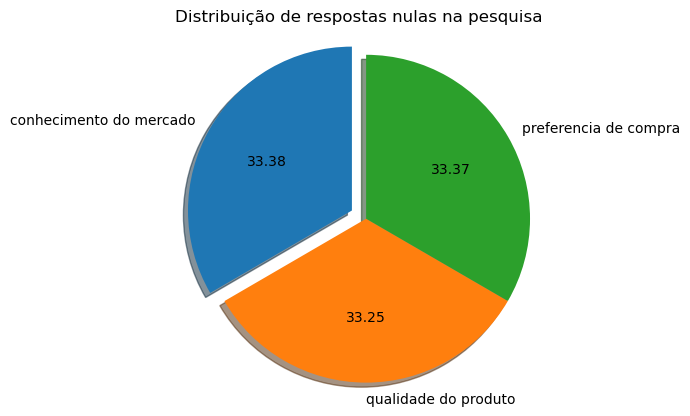

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'conhecimento do mercado', 'qualidade do produto', 'preferencia de compra'
sizes = [firstQuestion, secondQuestion, thirdQuestion]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.2f',shadow=True, startangle=90)
ax1.set_title('Distribuição de respostas nulas na pesquisa')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Parte 2: Análise

Chegamos na segunda parte do entregável!
Aqui será feita uma análise mais ampla do que o exercício anterior, por isso não tem um script com o que deve ser entregue. Por ser mais ampla e a análise variar de pessoa para pessoa, não tem uma única resposta correta. Todo raciocínio desenvolvido será avalidado, inclusive entender o que deve ser abordado ou não na análise.

Usaremos uma base diferente, em que estão representados as informações de venda de automóveis em um determinado ano.

O objetivo aqui é conseguir extrair insights para um cliente que está realizando uma pesquisa sobre o mercado de carros..

Tendo isso em vista, desenvolva uma análise exploratória dessa base de dados, buscando entender quais informações são relevantes para a precificação de um determinado veículo. Busque entender a relação entre as colunas e para isso você pode utilizar algumas bibliotecas para te auxiliar, como: MatPlotLib e Pandas. Disponibilizaremos treinamentos sobre ambas bibliotecas.
Além disso, você pode pesquisar outras bibliotecas disponíveis, como a Scikit-learn, para complementar a sua análise com métodos de Machine Learning como KNN, regressão logística, regressão linear, SVM e árvores de decisão. Lembrando que a utilização desses métodos não é obrigatória.



Explicação das colunas das bases

* car : Marca do carro 

* price: Preço do carro

* body : Tipo do carro

* mileage : Quilometragem do carro

* engV : Volume da engrenagem

* engType : Combustível de abastecimento

* registration : Se está registrado ou não

* year: Ano do carro

* model : Modelo do carro 

* drive : Tração do carro











# 1. Objetivo
Essa analise tem o objetivo de estudar esta base de dados através de uma análise exploratória para entender a relação do preço com as caracteristicas de um carro 

## 1.1 Foco da análise
Essa análise busca encontrar as melhores propostas e informações para quem deseja comprar ou vender carros populares, com preços mais baixos.


In [23]:
# Importação das bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#lendo a base de dados
car_df = pd.read_csv('car_ad.csv', encoding="ISO-8859-1")

# 2. Análise geral da base de dados:
#### Variáveis Quantitativas
- A base de dados contém 9576 linhas e 10 colunas.
- O preço varia de 0 a 547800
- O ano varia de 1953 a 2016
- A quilometragem do carro varia de 0Km a 999Km
- O Volume da engrenagem varia de 0.1 a 99.9

#### Variáveis Qualitativas
- Há 87 marcas de carros
- Há 6 tipos de carros
- Há 4 tipos de combustivel de abastecimento
- Tem carros registrado e carros não registrados
- Há 888 modelos de carros
- Ha 3 tipos de tração de carro

In [25]:
#quantidade de linhas e colunas
car_df.shape

(9576, 10)

In [26]:
#estatistica das variaveis quantitativas
car_df.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


obtenção dos dados acima

In [27]:
car_df.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [28]:
display(car_df['car'].nunique())

87

In [29]:
car_df['body'].nunique()

6

In [30]:
car_df['engType'].nunique()

4

In [31]:
car_df['registration'].nunique()

2

In [32]:
car_df['model'].nunique()

888

In [33]:
car_df['drive'].nunique()

3

# 3. Filtros
De acordo com a análise geral da base de dados, foi identificado a necessidade de aplicar os filtros abaixo para que seja feito a análise proposta

In [34]:
#excluindo registros com preço igual a zero
car_df = car_df[car_df['price'] != 0]
#Agregando as categorias de combustive Gas e Petrol em uma unica categoria, já que são nomes diferentes para o mesmo tipo de combustivel
car_df['engType'] = car_df['engType'].replace(['Petrol'], 'Gas')


Como foi observado que há carros de 1953 até 2016, foi feito uma análise dos anos com maior quantidade de carros para selecionar os anos mais relevantes para essa análise. 
Conforme mostrado no código abaixo, vamos seguir a análise com a faixa de 2005 a 2016.

In [35]:
test = car_df.groupby(['year'])['year'].count().sort_values(ascending=False).head(10)
test

year
2008    1142
2007     911
2012     748
2011     684
2013     632
2006     558
2005     410
2016     394
2010     388
2014     344
Name: year, dtype: int64

In [36]:
#selecionando os carros com ano superior ou igual a 2005
df_new = car_df[car_df['year'] >= 2005]

In [37]:
display(df_new['year'].min())
display(df_new['year'].max())

2005

2016

Para obter os insights e recomendações para compra e venda de carros com valores menores, foi realizado a análise abaixo para selecionar os carros que estão na faixa de preços mais baratos

In [38]:
display(df_new.price.quantile(0.95)) #P95%
display(df_new.price.quantile(0.90)) #P50% 
display(df_new.price.quantile(0.75)) #P75%

63233.25

40850.0

21000.0

Analisando os preços dos carros, considerando a base com os carros de ano de 2005 a 2016:
- 75% dos carros tem preço de até 21.000
- 90% dos carros tem preço até 40.850
- 95% dos carros tem preço até 63.233.25

Portanto, as próximas análises serão realizadas na base que contém 75% dos dados, onde o preço máximo é 21000,00

In [39]:
#carros baratos, 75% da base de dados
df_cheaper = df_new[df_new['price'] <= 21000]

In [40]:
#carros mais caros
df_expensive = df_new[df_new['price'] > 21000]

# 4. Variáveis Quantitativas

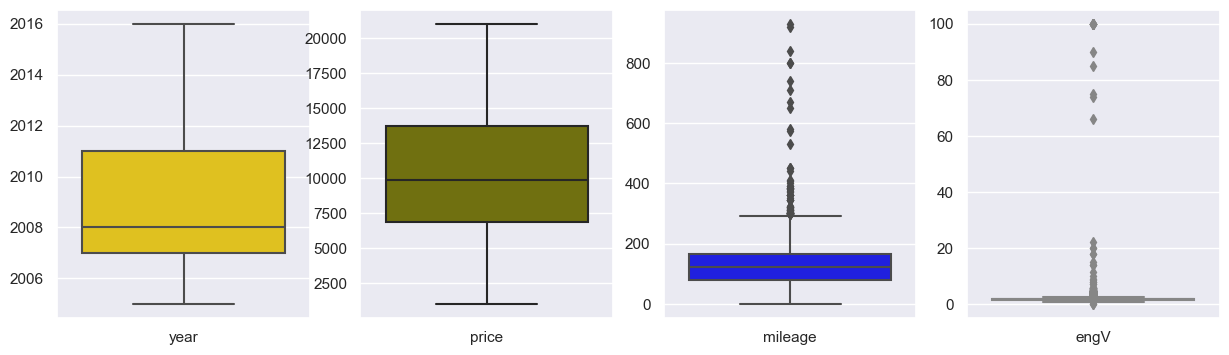

In [41]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.boxplot(data=df_cheaper[["year"]],color="gold", orient="v",ax=axs[0])
sns.boxplot(data=df_cheaper[["price"]],color="olive", orient="v",ax=axs[1])
sns.boxplot(data=df_cheaper[["mileage"]],color="blue", orient="v",ax=axs[2])
sns.boxplot(data=df_cheaper[["engV"]],color="pink", orient="v",ax=axs[3])

plt.show()

#### Análise:

- **Year:** Conforme o filtro aplicado, estamos analisando os carros de 2005 a 2016
- **Price:** A maioria dos carros, estão na faixa de preço entre aproximadamente 7500 a 13500 
- **Mileage:** A maioria dos carros estão com a quilometragem na faxia de 100 km a 190 km, mas há muitos outliers, que são os carros com uma quilometragem alta, chegando até 900 km.
- **engV:** A maioria dos carros tem volume de engrenagem baixa, de aproximadamente 3 a 4, mas há muitos outliers, que são carros com um volume de engrenagem de até 99.99.

# 5. Variáveis Qualitativas

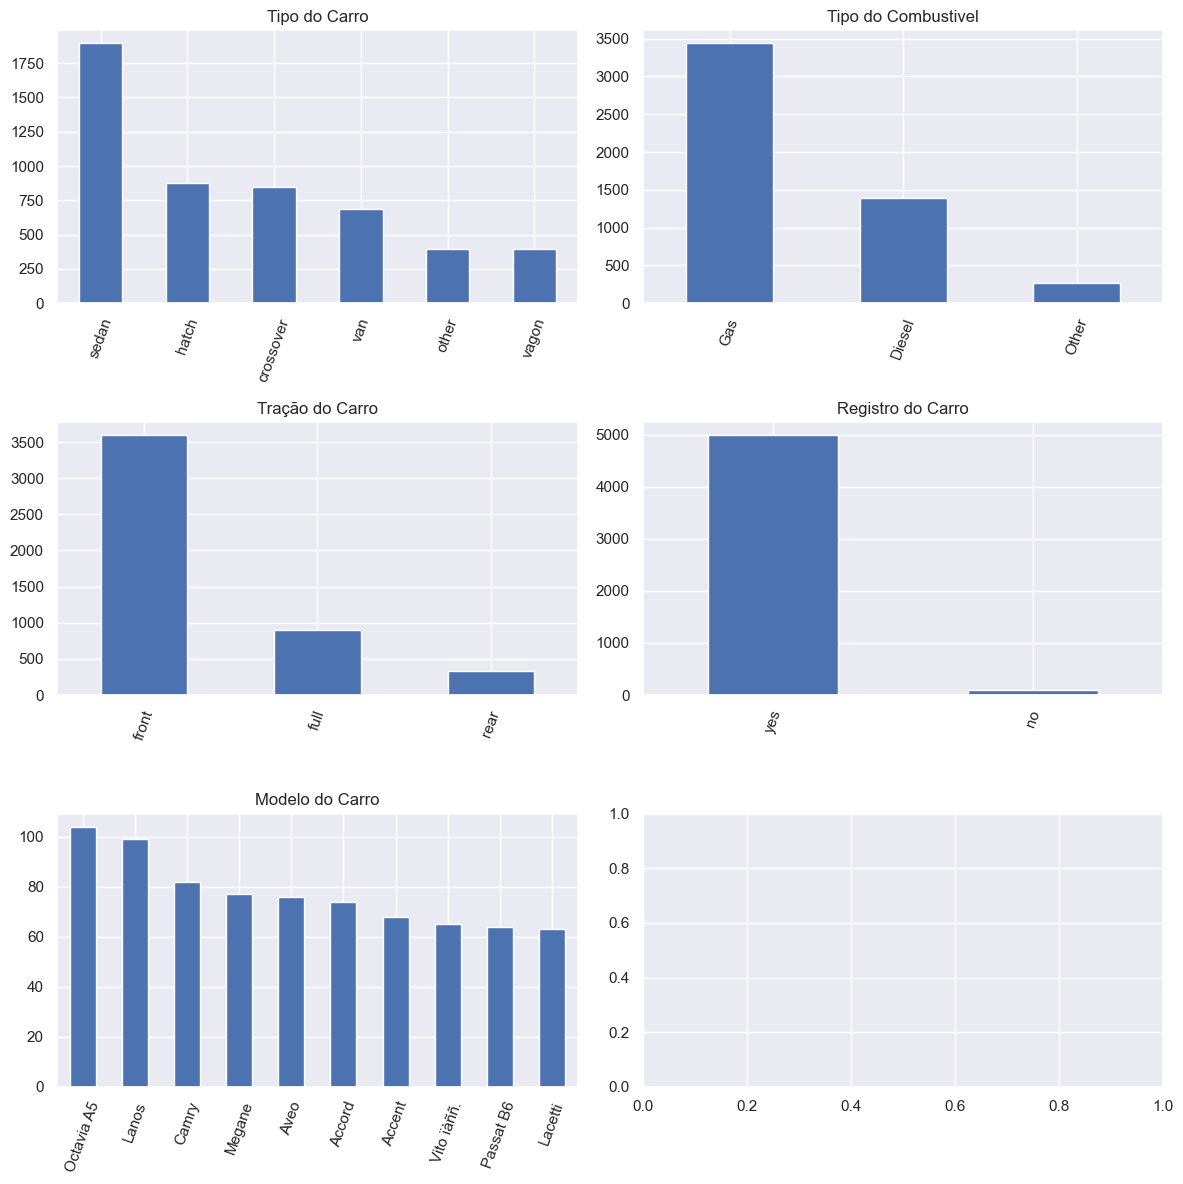

In [42]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# plot barplot
df_cheaper["body"].value_counts().head(10).plot(kind = 'bar', ax=axs[0, 0])
df_cheaper["engType"].value_counts().head(10).plot(kind = 'bar', ax=axs[0, 1])
df_cheaper["drive"].value_counts().head(10).plot(kind = 'bar', ax=axs[1,0])
df_cheaper["registration"].value_counts().head(10).plot(kind = 'bar', ax=axs[1,1])
df_cheaper["model"].value_counts().head(10).plot(kind = 'bar', ax=axs[2,0])

axs[0,0].tick_params(axis = 'x',rotation=70)
axs[0,1].tick_params(axis = 'x',rotation=70)
axs[1,0].tick_params(axis = 'x',rotation=70)
axs[1,1].tick_params(axis = 'x',rotation=70)
axs[2,0].tick_params(axis = 'x',rotation=70)

axs[0,0].set_title('Tipo do Carro')
axs[0,1].set_title('Tipo do Combustivel')
axs[1,0].set_title('Tração do Carro')
axs[1,1].set_title('Registro do Carro')
axs[2,0].set_title('Modelo do Carro')

plt.tight_layout()
plt.show()


#### Análise:

- **Body:** Analisando os tipos de carros, vemos que o tipo sedan é o mais popular, pois tem aproximadamente o dobro de quantidade de carros comparados com os demais tipos como hatch, crossover, etc.
- **engType:** Como fizemos o tratamento para juntar gas e petrol, podemos analisar que esse tipo de combustivel é o mais popular, pois ele representa aproximadamente 70% da base.
- **Drive:** A tração do carro dianteira é a mais predominante, representando aproximadamente 75% da base de dados e a tração traseira é a menos pouplar, com apenas 6% da base.
- **Registration:** A grande maioria dos carros estão registrados, e somente aproximadamente 2% não foram registrados.
- **Model:** Analisamos os top 10 modelos com mais quantidade de carros, e o modelo Octavia A5 é o modelo mais popular, com mais de carros.

# Conclusão

Analisando as variáveis mais relevantes em relação ao preço, pudemos obter alguns insights que podem suportar as decisões para compra e venda de carros populares.

### Insight 1 - Ano do Carro
Analisando a evolução do preço em relação ao ano do carro, foi vailado que quanto mais novo o carro, mais caro.

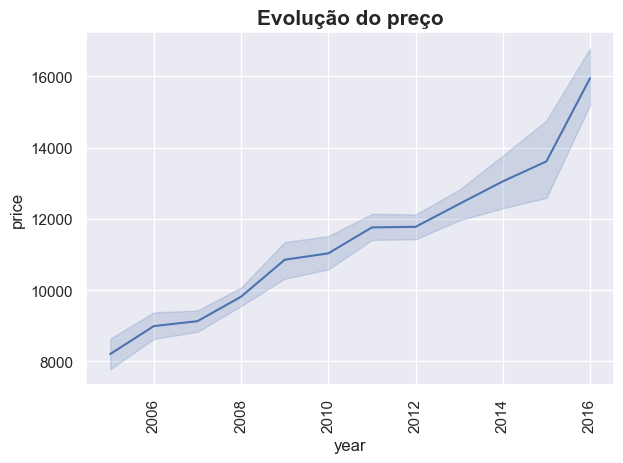

In [43]:
plt.title('Evolução do preço', fontsize=15, fontweight="bold")
multi = sns.lineplot(x='year', 
                     y='price',  
                     data=df_cheaper)
plt.xticks(rotation=90)
plt.tight_layout()

### Insight 2 - milhagem
Analisando a evolução do preço em relação a o quanto o carro foi rodado, não foi possivel validar a tendencia de quão mais rodado mais barato. Variáveis como o tipo do carro influenciam muito mais do que a milhagem

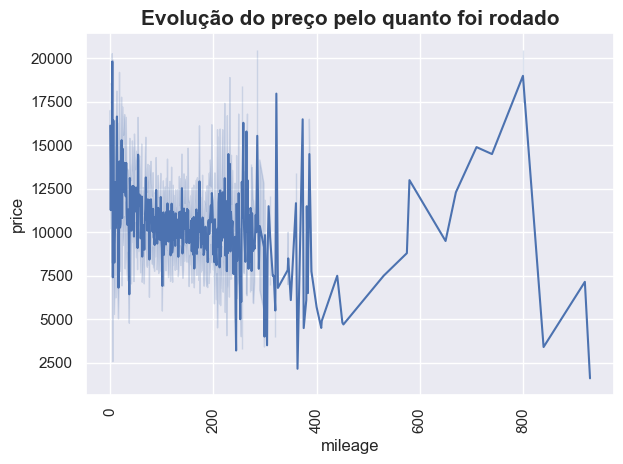

In [44]:
plt.title('Evolução do preço pelo quanto foi rodado', fontsize=15, fontweight="bold")
multi = sns.lineplot(x='mileage', 
                     y='price',  
                     data=df_cheaper)
plt.xticks(rotation=90)
plt.tight_layout()

### Insight 3 - Modelos dos carros
Analisando a evolução do preço em relação aos anos e modelos dos carros, o crossover sempre liderou com os preços mais altos, porém no ultimo ano, o modelo que foi chamado como Others, ultrapssou o modelo crossover. E o modelo hatch que até 2011 era o modelo mais barato, chegou em 2016 como quarto modelo mais barato, equiparando com o modelo vagon.

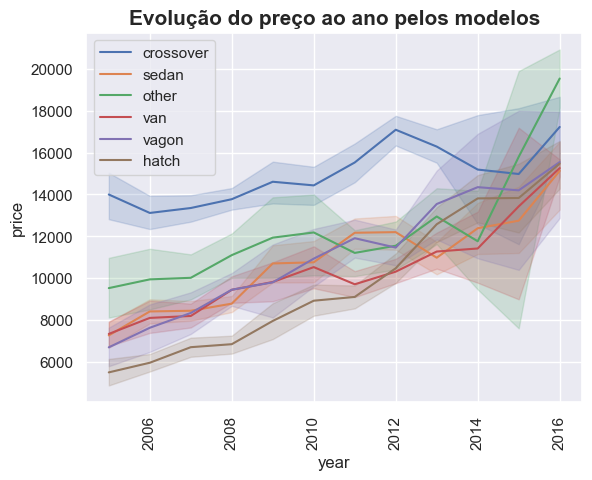

In [45]:
plt.title('Evolução do preço ao ano pelos modelos', fontsize=15, fontweight="bold")
multi = sns.lineplot(x='year', 
                     y='price',  
                     data=df_cheaper.loc[df_cheaper['body'] == 'crossover'],
                     label = 'crossover')
plt.xticks(rotation=90)


multi1 = sns.lineplot(x='year', 
                     y='price',  
                     data=df_cheaper.loc[df_cheaper['body'] == 'sedan'],
                     label = 'sedan')

multi2 = sns.lineplot(x='year', 
                     y='price',  
                     data=df_cheaper.loc[df_cheaper['body'] == 'other'],
                     label = 'other')

multi3 = sns.lineplot(x='year', 
                     y='price',  
                     data=df_cheaper.loc[df_cheaper['body'] == 'van'],
                     label = 'van')

multi4= sns.lineplot(x='year', 
                     y='price',  
                     data=df_cheaper.loc[df_cheaper['body'] == 'vagon'],
                     label = 'vagon')

multi5= sns.lineplot(x='year', 
                     y='price',  
                     data=df_cheaper.loc[df_cheaper['body'] == 'hatch'],
                     label = 'hatch')

### Insight 3 - Quilometragem dos carros
Analisando a evolução do preço em relação a quilometragem dos carros, observamos que os preços variam mas a quilometragem se mantem de 0 a 300Km aproximadamente, com alguns poucos outliers.

Text(0.5, 1.0, 'Quilometragem x Preço')

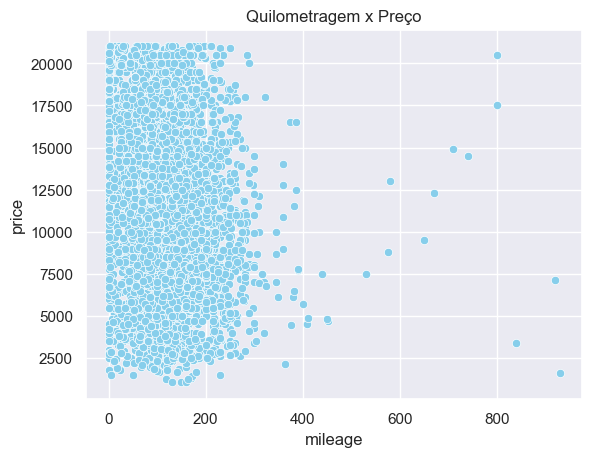

In [46]:
sns.scatterplot(data=df_cheaper,x="mileage",y = "price" , color="skyblue").set_title('Quilometragem x Preço')

### Insight 4 - Volume de engrenagem dos carros
Analisando a evolução do preço em relação ao volume da engrenagem dos carros, observamos que quanto maior o valor maior o volume da engrenagem, porém há alguns carros com volume de engrenagem bem alto, chegando a 100, mas que não possuem os valores mais altos.

Text(0.5, 1.0, 'engV x price')

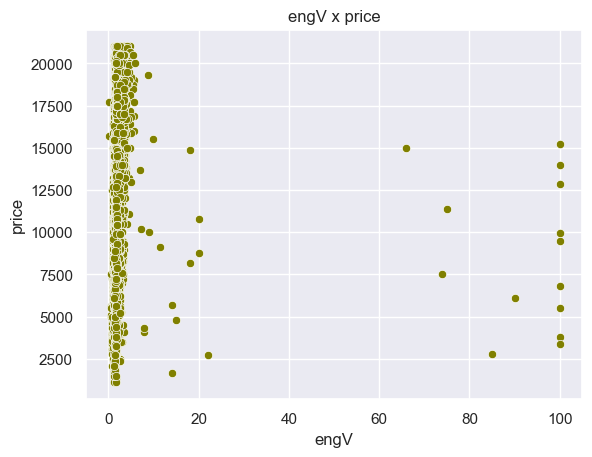

In [47]:
sns.scatterplot(data=df_cheaper,x="engV", y = "price",color="olive").set_title('engV x price')

Em suma, para se achar um carro barato as variáveis que se demonstraram mais relevantes foram o ano e o modelo do carro. A primeira é definida por quão mais antigo o carro mais barato. A segunda, carros como hatch, van e vagon são em média mais baratos.